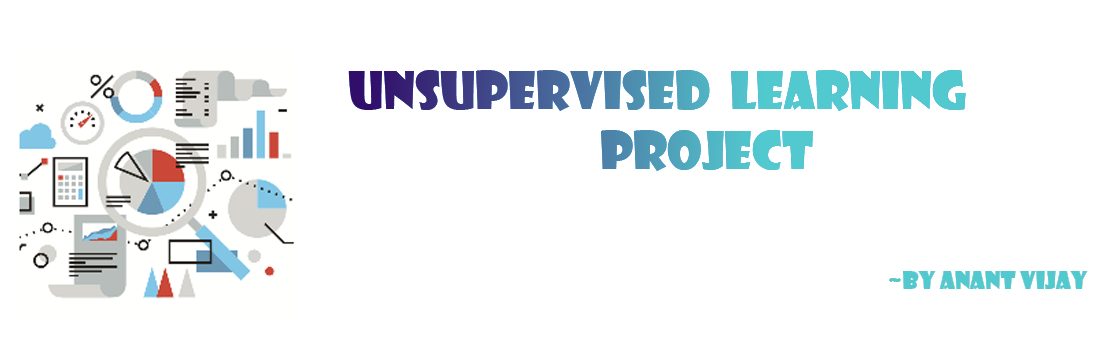

# **CONTEXT**


All Life Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

# **OBJECTIVE**

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

# **DATA DESCRIPTION**

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

# **DATA DICTIONARY**



*   Sl_No: Primary key of the records

*   Customer Key: Customer identification number

*   Average Credit Limit: Average credit limit of each customer for all credit cards
*   Total credit cards: Total number of credit cards possessed by the customer


*   Total visits bank: Total number of visits that the customer made (yearly) personally to the bank


*   Total visits online: Total number of visits or online logins made by the customer (yearly)


*   Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)



















# **CRITERIA**

**Exploratory Data Analysis**

- Problem definition - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

**Data Preprocessing**

- Missing Value Treatment (with rationale if needed) - Outlier Detection and Treatment (with rationale if needed) - Feature Engineering (with rationale if needed) - Data Scaling (with rationale if needed)

**K-means Clustering**

- Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling

**Hierarchical Clustering**

- Apply Hierarchical clustering with different linkage methods - Plot dendrograms for each linkage method - Check cophenetic correlation for each linkage method - Figure out the appropriate number of clusters - Cluster Profiling

**K-means vs Hierarchical Clustering**

Compare clusters obtained from K-means and Hierarchical clustering techniques

**Actionable Insights & Recommendations**

- Actionable insights and recommendations

**Business Report Quality**

- Adhere to the business report checklist

# **IMPORTING LIBRARY**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_excel('/content/Credit+Card+Customer+Data.xlsx')

In [2]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data.shape

(660, 7)

In [6]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


# **SANITY CHECK**

In [7]:
data.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [8]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


**There are no Missing or Duplicate values in the dataset**

# **EXPLORATORY DATA ANALYSIS**

## **UNIVARIATE ANALYSIS**

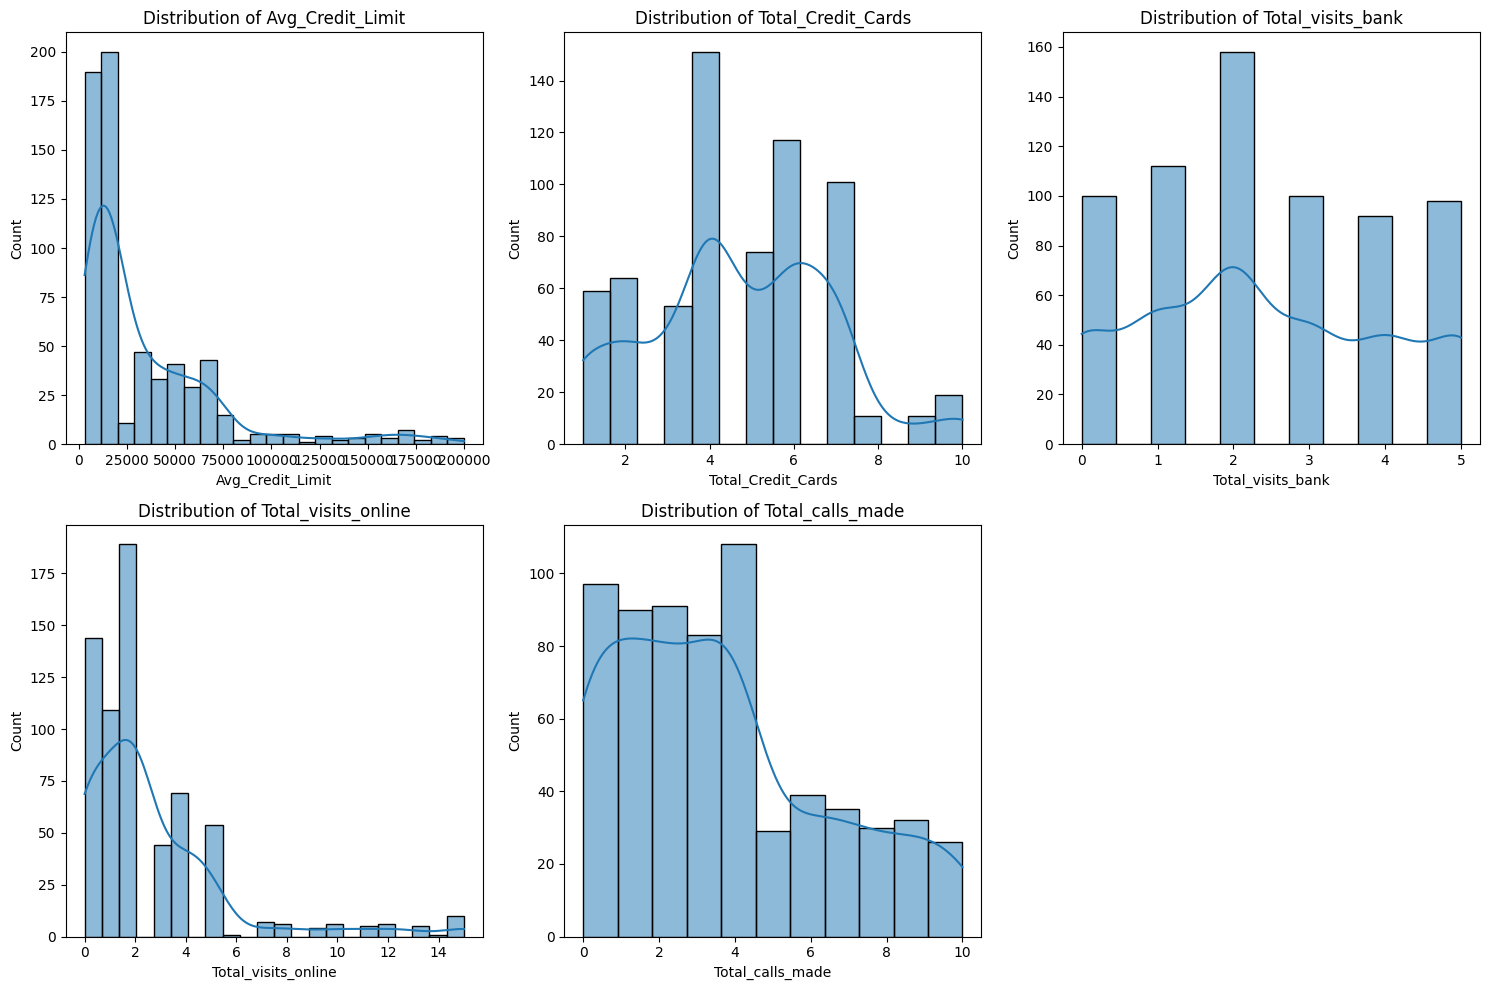

In [9]:
plt.figure(figsize=(15,10))
numerical_cols = data.columns[2:]
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

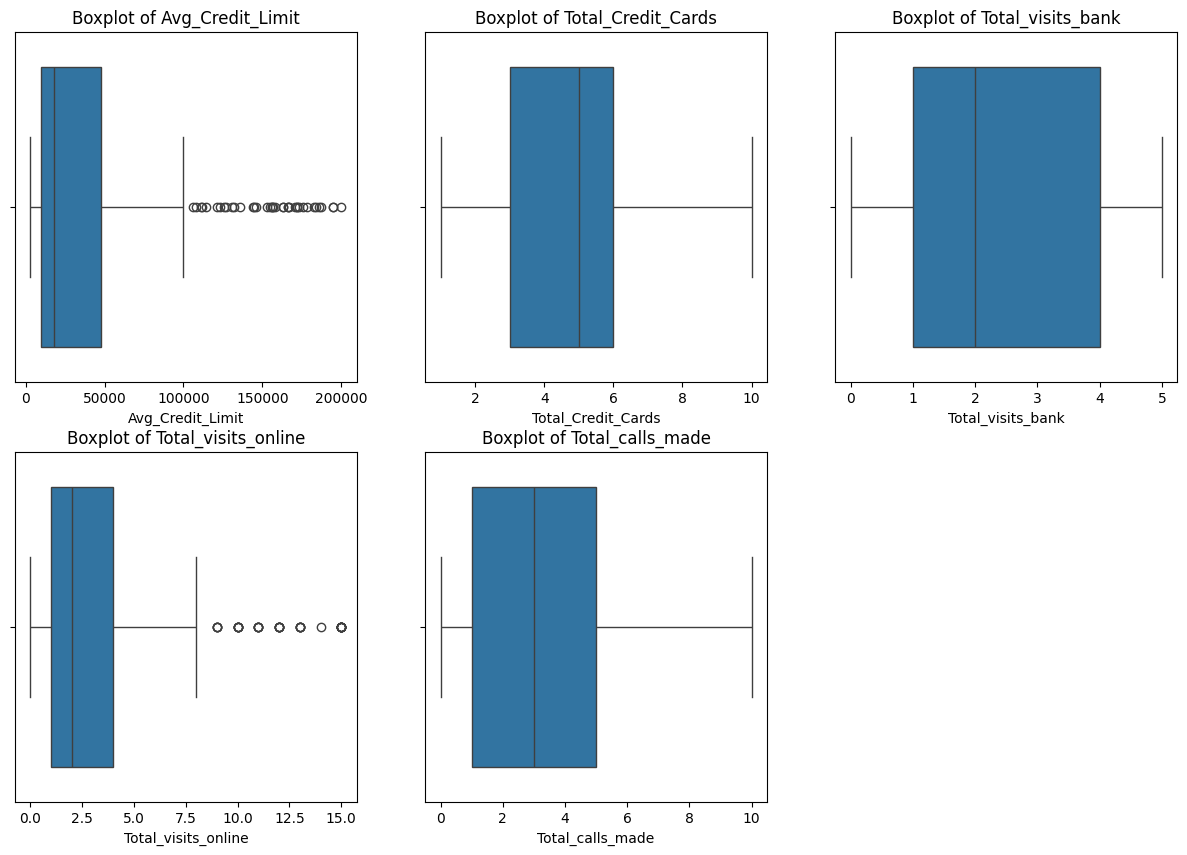

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

## **BIVARIATE ANALYSIS**

This step will involve examining relationships between two variables at a time, particularly focusing on how interactions might be associated with credit-related variables.

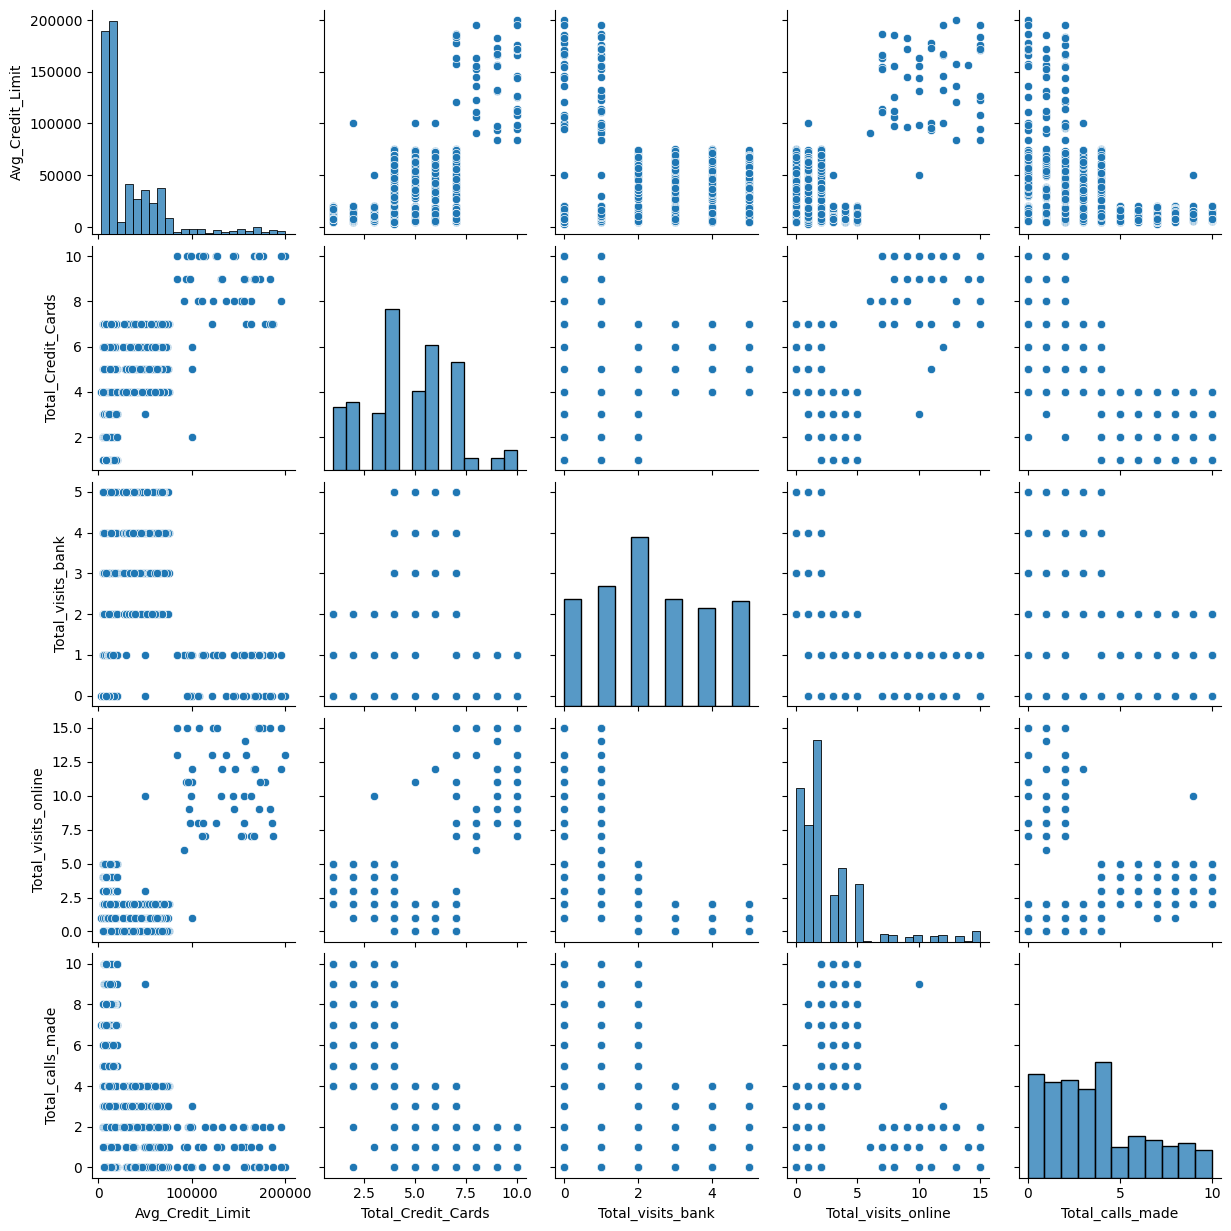

In [11]:
sns.pairplot(data[numerical_cols])
plt.show()



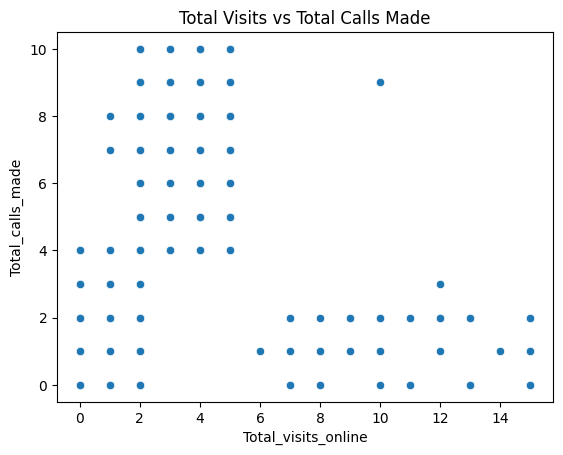

In [12]:
sns.scatterplot(x='Total_visits_online', y='Total_calls_made', data=data)
plt.title('Total Visits vs Total Calls Made')
plt.show()

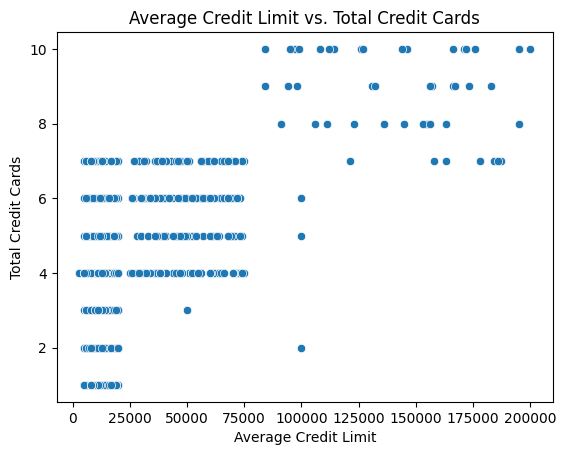

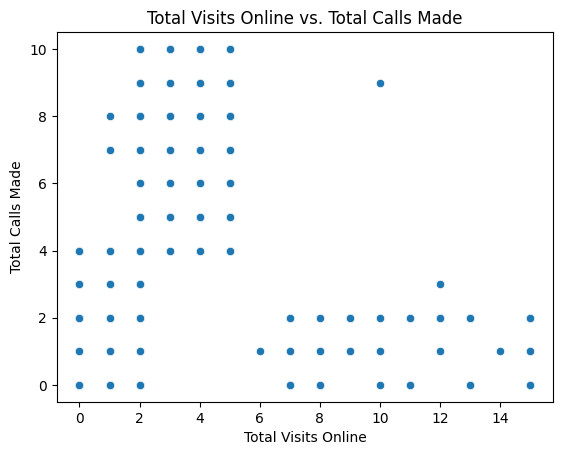

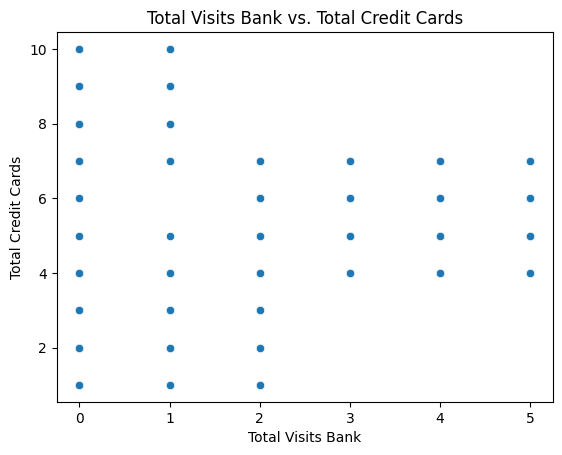

In [13]:
# Plot scatter plots for key pairs of variables
sns.scatterplot(x=data['Avg_Credit_Limit'], y=data['Total_Credit_Cards']) # Changed column names to match DataFrame
plt.title('Average Credit Limit vs. Total Credit Cards')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.show()

sns.scatterplot(x=data['Total_visits_online'], y=data['Total_calls_made'])
plt.title('Total Visits Online vs. Total Calls Made')
plt.xlabel('Total Visits Online')
plt.ylabel('Total Calls Made')
plt.show()

sns.scatterplot(x=data['Total_visits_bank'], y=data['Total_Credit_Cards']) # Changed column names to match DataFrame
plt.title('Total Visits Bank vs. Total Credit Cards')
plt.xlabel('Total Visits Bank')
plt.ylabel('Total Credit Cards')
plt.show()

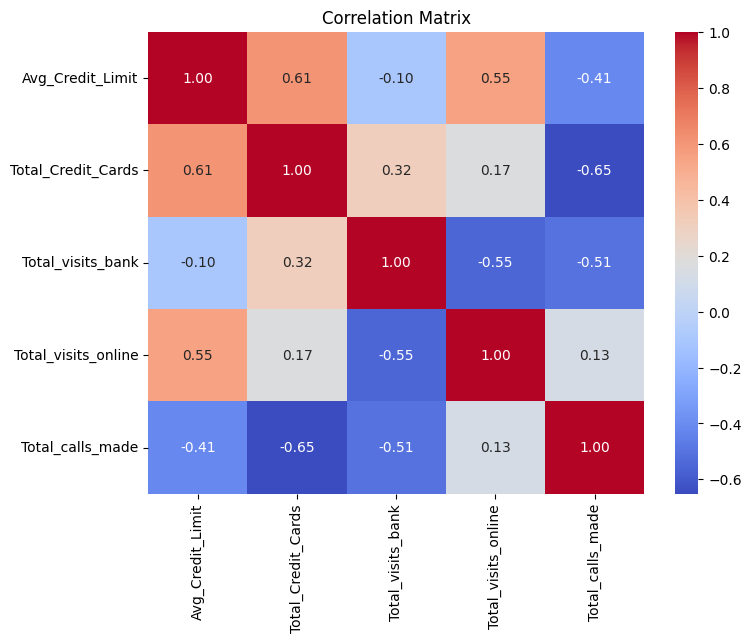

In [14]:

corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **DATA PREPROCESSING**

In [15]:
data.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [16]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


**NO DUPLICATE VALUES OR MISSING VALUES FOUD DURING THE SANITY CHECK**

## **Outlier Detection and Treatment**

In [17]:
from scipy import stats
import pandas as pd
import numpy as np

z_scores = np.abs(stats.zscore(data[numerical_cols]))
outliers = (z_scores > 3).all(axis=1)

data_no_outliers = data[~outliers]

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

data_no_outliers = data[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**OUTLIERS HAVE BEEN TREATED USING FORMULA:**

**Q1 = data[numerical_cols].quantile(0.25)**

**Q3 = data[numerical_cols].quantile(0.75)**

**IQR = Q3 - Q1**

## **Feature Engineering**

**Feature engineering is an essential step to improve the performance of machine learning models. Based on the data description, we can use the following features:**

*Average Credit Limit*

*Total Credit Cards*

*Total Visits Bank*

*Total Visits Online*

*Total Calls Made*

**We can create additional features like the total interactions, combining bank visits, online visits, and calls.**

In [18]:
# Create a new feature 'Total Interactions'
data['Total Interactions'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']

# Inspect the new data
print(data[['Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Total Interactions']].head())

   Total_visits_bank  Total_visits_online  Total_calls_made  \
0                  1                    1                 0   
1                  0                   10                 9   
2                  1                    3                 4   
3                  1                    1                 4   
4                  0                   12                 3   

   Total Interactions  
0                   2  
1                  19  
2                   8  
3                   6  
4                  15  


## **Data Scaling**

Since the features like "Total credit cards" and "Average credit limit" have different scales, we should scale the data before applying the clustering algorithm.

We will use StandardScaler for this, which standardizes the data to have a mean of 0 and a standard deviation of 1.

In [19]:
# Select relevant columns for clustering
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
            'Total_visits_online', 'Total_calls_made', 'Total Interactions']

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Check the scaled data
print(pd.DataFrame(scaled_data, columns=features).head())


   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  Total Interactions  
0            -0.547490         -1.251537           -1.935936  
1             2.520519          1.891859            3.056296  
2             0.134290          0.145528           -0.173972  
3            -0.547490          0.145528           -0.761293  
4             3.202298         -0.203739            1.881653  


# **K-MEANS CLUSTERING**

Now we will apply K-means clustering. Before selecting the appropriate number of clusters, we will use the Elbow Method and Silhouette Score to decide the optimal number of clusters.

### **Elbow Method**


The elbow method helps us to identify the number of clusters by plotting the sum of squared distances (inertia) against the number of clusters.

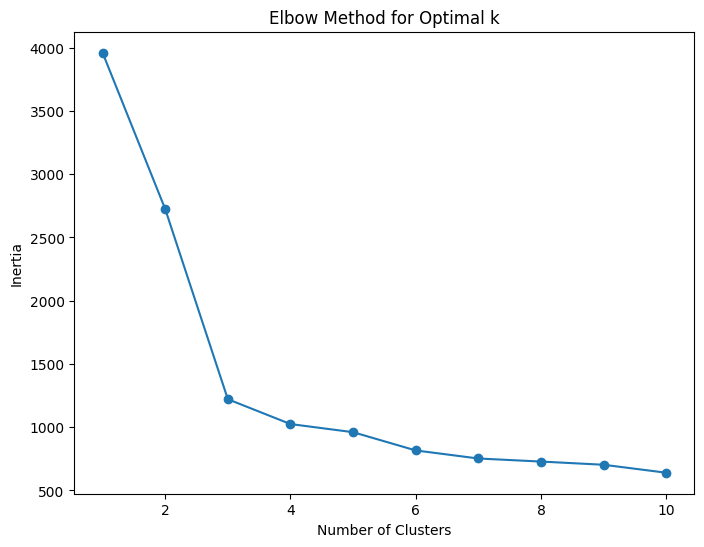

In [20]:
from sklearn.cluster import KMeans

# Elbow Method to determine the optimal number of clusters
inertia = []
range_n_clusters = list(range(1, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### **Silhouette Score**

The silhouette score helps evaluate the quality of the clusters. A higher silhouette score indicates better-defined clusters.

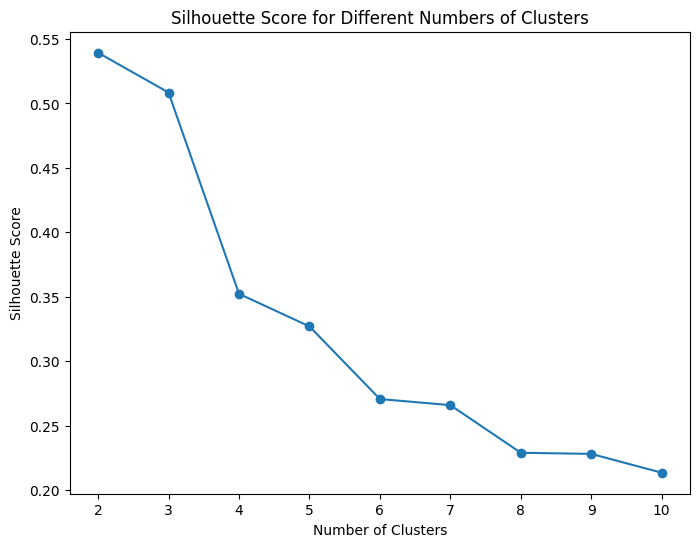

In [21]:
from sklearn.metrics import silhouette_score

# Silhouette Score for different numbers of clusters
silhouette_scores = []

for n_clusters in range_n_clusters[1:]:  # Start from 2 clusters, since silhouette score is undefined for 1 cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Based on both methods, k = 3 appears to be the optimal number of clusters.**

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Inspect the clusters
print(data[['Customer Key', 'Cluster']].head())

   Customer Key  Cluster
0         87073        0
1         38414        2
2         17341        0
3         40496        0
4         47437        1


### **Cluster Profiling**

To understand the different customer segments, we will compute the mean values of the features for each cluster. This will give us a profile of each segment.

In [23]:
# Cluster profiling
cluster_profile = data.groupby('Cluster')[features].mean()
print(cluster_profile)

         Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0            33664.948454            5.505155           3.476804   
1           141040.000000            8.740000           0.600000   
2            12184.684685            2.400901           0.932432   

         Total_visits_online  Total_calls_made  Total Interactions  
Cluster                                                             
0                   0.984536          2.002577            6.463918  
1                  10.900000          1.080000           12.580000  
2                   3.572072          6.909910           11.414414  


### **Visualizing the Clusters**

To visualize the clusters, we can reduce the dimensionality of the data to two dimensions using PCA (Principal Component Analysis) and plot the clusters.

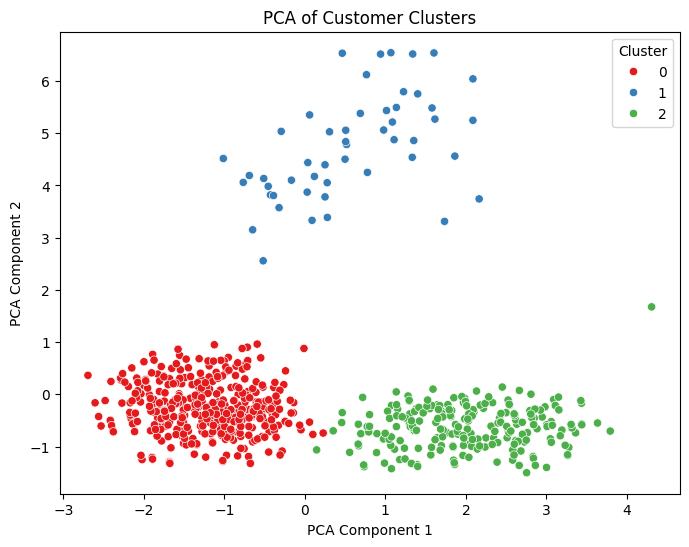

In [24]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('PCA of Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# **HIERARCHICAL CLUSTERING**

### **Hierarchical Clustering with Different Linkage Methods**

**There are different linkage methods for hierarchical clustering:**

*   **Single linkage:** Minimum distance between clusters.
*   **Complete linkage:** Maximum distance between clusters.
*   **Average linkage:.** Average distance between clusters
*   **Ward linkage:.** Minimizes variance within clusters








**We will apply each of these methods and plot their dendrograms.**

### **Compute Linkage Matrix for Different Methods**

We will compute the linkage matrix for different linkage methods and plot the corresponding dendrograms.

In [25]:
from scipy.cluster.hierarchy import linkage # Import the linkage function

# Compute linkage matrix using different linkage methods
methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {method: linkage(scaled_data, method=method) for method in methods}

### **Plot Dendrograms for Each Linkage Method**

We'll plot the dendrograms for each of the linkage methods to visualize the hierarchical relationships.

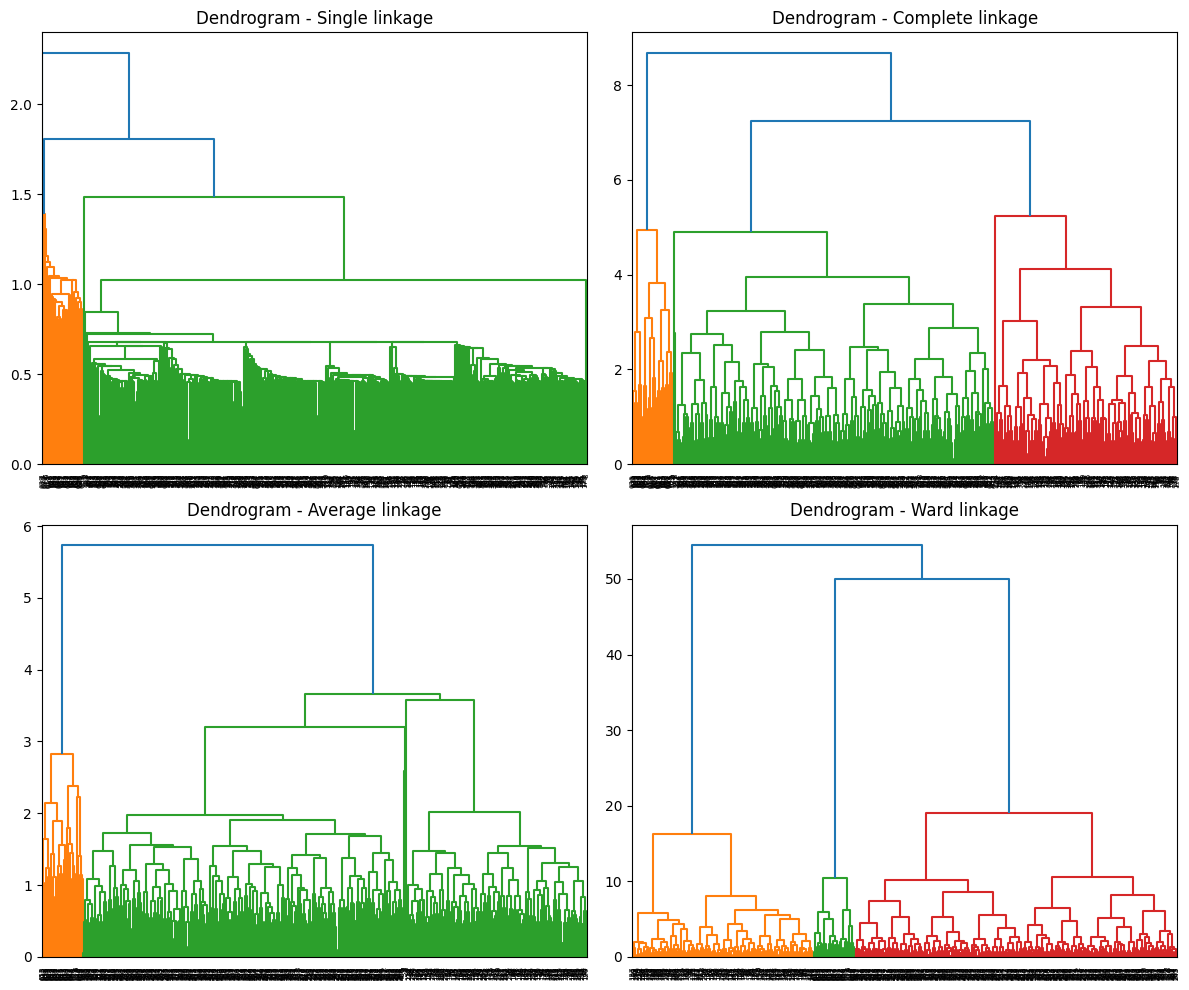

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# Compute linkage matrix using different linkage methods
methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {method: linkage(scaled_data, method=method) for method in methods}


# Plot dendrograms for each linkage method
plt.figure(figsize=(12, 10))
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    dendrogram(linkage_matrices[method]) # Now dendrogram is recognized
    plt.title(f'Dendrogram - {method.capitalize()} linkage')

plt.tight_layout()
plt.show()

### **Cophenetic Correlation for Each Linkage Method**

Cophenetic correlation is used to assess how well the hierarchical clustering preserves the pairwise distances between points. A higher cophenetic correlation indicates that the clustering method better preserves the distance relationships.

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Compute cophenetic correlation for each linkage method
cophenetic_corr = {}
for method in methods:
    coph_dist, _ = cophenet(linkage_matrices[method], pdist(scaled_data))
    cophenetic_corr[method] = coph_dist

# Display cophenetic correlations
print("Cophenetic Correlation for each linkage method:")
for method, score in cophenetic_corr.items():
    print(f"{method.capitalize()}: {score}")

Cophenetic Correlation for each linkage method:
Single: 0.6993298395303145
Complete: 0.8363158376706361
Average: 0.8785684415868794
Ward: 0.7468468041854454


### **Determine the Appropriate Number of Clusters**

From the dendrogram, we can decide the optimal number of clusters by looking at the largest vertical distance without any horizontal lines cutting through it.
The dendrogram for Wards method shows the largest vertical gap just below 40, suggesting an optimal distance threshold in the range of 35–40. Hence we select 37

In [28]:
from scipy.cluster.hierarchy import fcluster

# Define a distance threshold to cut the dendrogram
distance_threshold = 37

# Apply fcluster to assign clusters
clusters = fcluster(linkage_matrices['ward'], distance_threshold, criterion='distance')

# Add cluster labels to the data
data['Cluster'] = clusters

# Check the first few rows with cluster labels
print(data[['Customer Key', 'Cluster']].head())

   Customer Key  Cluster
0         87073        3
1         38414        1
2         17341        3
3         40496        1
4         47437        2


In [29]:
# Check the number of unique clusters
num_clusters = data['Cluster'].nunique()
print(f"Number of clusters: {num_clusters}")

Number of clusters: 3


### **Cluster Profiling**

Calculating the mean values of each feature for each cluster to profile them.

In [39]:
# Cluster profiling: calculate mean values of features for each cluster
cluster_profile = data.groupby('Cluster')[features].mean()
print(cluster_profile)

         Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
1            12250.000000            2.400000           0.927273   
2           141040.000000            8.740000           0.600000   
3            33517.948718            5.489744           3.466667   

         Total_visits_online  Total_calls_made  Total Interactions  
Cluster                                                             
1                   3.568182          6.945455           11.440909  
2                  10.900000          1.080000           12.580000  
3                   1.000000          2.007692            6.474359  


### **Visualizing the Clusters**

We can also visualize the clusters in 2D using PCA (Principal Component Analysis) for better interpretability.

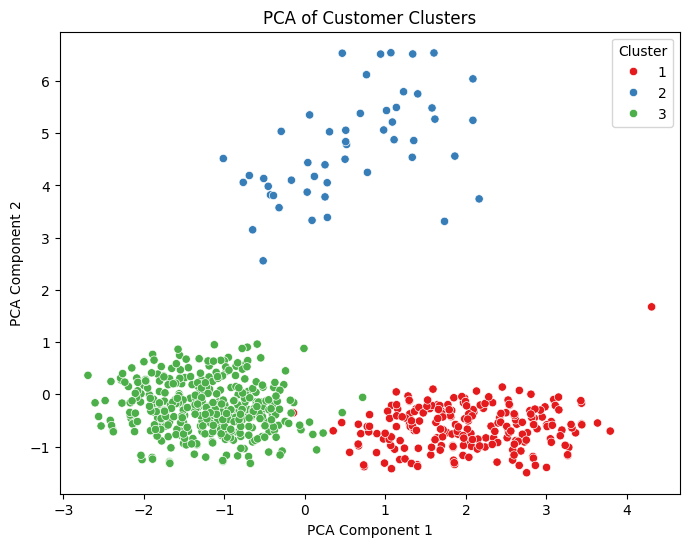

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('PCA of Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# **K-MEANS VS HIERARCHICAL CLUSTERING**


**To compare the clusters obtained from K-means and Hierarchical Clustering, we will:**



1.   Apply both clustering techniques to the same dataset.
2.   Analyze and visualize the clusters.
3.   Compare the characteristics and quality of the clusters using metrics such as the silhouette score, cluster distribution, and visual plots.







### **Apply K-means Clustering**

We will use K-means clustering with a pre-determined number of clusters (3)

In [42]:
from sklearn.cluster import KMeans

# Apply K-means clustering using 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Inspect the clusters assigned by K-means
print(data[['Customer Key', 'KMeans_Cluster']].head())

   Customer Key  KMeans_Cluster
0         87073               0
1         38414               2
2         17341               0
3         40496               0
4         47437               1


### **Apply Hierarchical Clustering**

We will use hierarchical clustering (Ward's method) to cluster the data. The threshold for cutting the dendrogram will be the same(37)

In [43]:
from scipy.cluster.hierarchy import fcluster

# Apply fcluster to assign clusters using hierarchical clustering (Ward's method)
distance_threshold = 37
hierarchical_clusters = fcluster(linkage_matrices['ward'], distance_threshold, criterion='distance')

# Add cluster labels from Hierarchical clustering to the data
data['Hierarchical_Cluster'] = hierarchical_clusters

# Inspect the clusters assigned by Hierarchical clustering
print(data[['Customer Key', 'Hierarchical_Cluster']].head())

   Customer Key  Hierarchical_Cluster
0         87073                     3
1         38414                     1
2         17341                     3
3         40496                     1
4         47437                     2


### **Cluster Profiling**

We'll compare the cluster profiles from both K-means and Hierarchical clustering. We'll calculate the mean of each feature for both sets of clusters.

In [44]:
from scipy.cluster.hierarchy import fcluster

# Apply fcluster to assign clusters using hierarchical clustering (Ward's method)
distance_threshold = 37
hierarchical_clusters = fcluster(linkage_matrices['ward'], distance_threshold, criterion='distance')

# Add cluster labels from Hierarchical clustering to the data
data['Hierarchical_Cluster'] = hierarchical_clusters # Make sure this line is executed before the groupby operation

# Inspect the clusters assigned by Hierarchical clustering
print(data[['Customer Key', 'Hierarchical_Cluster']].head())

# Cluster profiling for K-means clusters
kmeans_profile = data.groupby('KMeans_Cluster')[features].mean()
print("K-means Cluster Profile:\n", kmeans_profile)

# Cluster profiling for Hierarchical clusters
hierarchical_profile = data.groupby('Hierarchical_Cluster')[features].mean() # Now 'Hierarchical_Cluster' column should exist
print("Hierarchical Cluster Profile:\n", hierarchical_profile)

   Customer Key  Hierarchical_Cluster
0         87073                     3
1         38414                     1
2         17341                     3
3         40496                     1
4         47437                     2
K-means Cluster Profile:
                 Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
KMeans_Cluster                                                            
0                   33664.948454            5.505155           3.476804   
1                  141040.000000            8.740000           0.600000   
2                   12184.684685            2.400901           0.932432   

                Total_visits_online  Total_calls_made  Total Interactions  
KMeans_Cluster                                                             
0                          0.984536          2.002577            6.463918  
1                         10.900000          1.080000           12.580000  
2                          3.572072          6.909910           11

### **Visualizing Clusters (2D using PCA)**

To visually compare the clusters from both methods, we will use PCA (Principal Component Analysis) to reduce the data to two dimensions and plot the clusters.

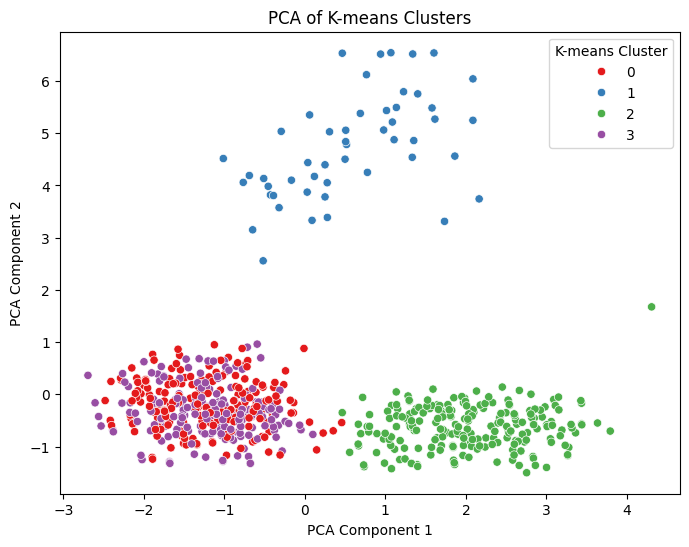

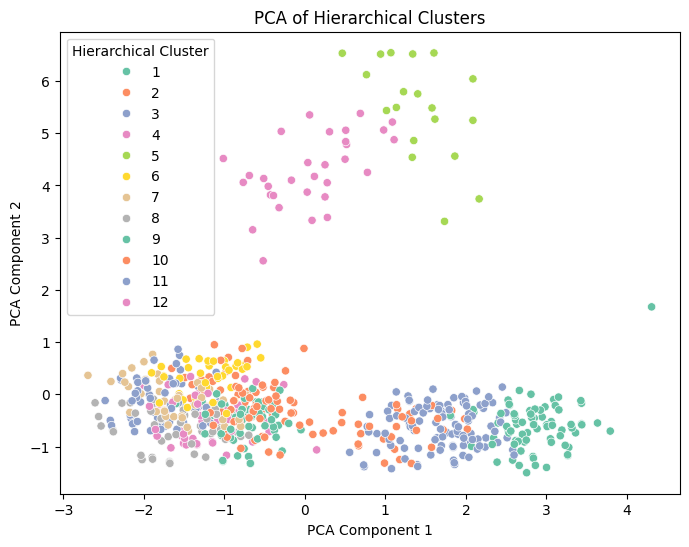

In [35]:
# Visualize K-means clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a scatter plot of the K-means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['KMeans_Cluster'], palette='Set1')
plt.title('PCA of K-means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='K-means Cluster')
plt.show()

# Visualize Hierarchical clusters using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Hierarchical_Cluster'], palette='Set2')
plt.title('PCA of Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Hierarchical Cluster')
plt.show()

### **Compare the Clusters**

**Cluster Distribution (Comparing the Number of Customers in Each Cluster)**

In [36]:
# Count of customers in each K-means cluster
kmeans_counts = data['KMeans_Cluster'].value_counts()
print("K-means Cluster Distribution:\n", kmeans_counts)

# Count of customers in each Hierarchical cluster
hierarchical_counts = data['Hierarchical_Cluster'].value_counts()
print("Hierarchical Cluster Distribution:\n", hierarchical_counts)

K-means Cluster Distribution:
 KMeans_Cluster
2    219
0    202
3    189
1     50
Name: count, dtype: int64
Hierarchical Cluster Distribution:
 Hierarchical_Cluster
3     111
10     78
1      77
9      63
11     59
8      58
12     50
7      44
6      38
2      32
4      31
5      19
Name: count, dtype: int64


### **Silhouette Score Comparison**

**The silhouette score will allow us to evaluate how well-separated the clusters are in both methods. A higher silhouette score indicates that the clusters are more distinct.**

In [37]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-means clustering
kmeans_silhouette = silhouette_score(scaled_data, data['KMeans_Cluster'])
print(f"Silhouette Score for K-means: {kmeans_silhouette}")

# Calculate silhouette score for Hierarchical clustering
hierarchical_silhouette = silhouette_score(scaled_data, data['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical clustering: {hierarchical_silhouette}")

Silhouette Score for K-means: 0.3522173630590933
Silhouette Score for Hierarchical clustering: 0.18459388466260834


### **Cluster Consistency**

To check if the clusters from K-means and Hierarchical clustering align, we can calculate the adjusted Rand index (ARI), which measures the similarity between two clusterings. An ARI closer to 1 indicates a high similarity.

In [38]:
from sklearn.metrics import adjusted_rand_score

# Compute Adjusted Rand Index (ARI) between K-means and Hierarchical clustering
ari = adjusted_rand_score(data['KMeans_Cluster'], data['Hierarchical_Cluster'])
print(f"Adjusted Rand Index (ARI) between K-means and Hierarchical Clustering: {ari}")

Adjusted Rand Index (ARI) between K-means and Hierarchical Clustering: 0.37063491886741956


# **END OF THE PROJECT**



